In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data
df_cleaned = pd.read_csv(r'tweets-data\cleaned.csv')

#slicing
df_cleaned = df_cleaned.iloc[:1001,:]
df_cleaned

,created_at,full_text,location,mentions,tokens,stemmed_tokens,clean_text
0,Tue Sep 17 23:55:49 +0000 2024,Yuk ganyang Fufufafa sesuai anjuran HRS PKS pa...,NaN,"['@UusRsd', '@msaid_didu']","['Yuk', 'ganyang', 'Fufufafa', 'sesuai', 'anju...","['yuk', 'ganyang', 'fufufafa', 'sesuai', 'anju...",yuk ganyang fufufafa sesuai anjur hrs pks bera...
1,Tue Sep 17 23:55:41 +0000 2024,Biasadrama mulyonopura kaget fufufafa fufufafaaaa,NaN,['@kompascom'],"['Biasadrama', 'mulyonopura', 'kaget', 'fufufa...","['biasadrama', 'mulyonopura', 'kaget', 'fufufa...",biasadrama mulyonopura kaget fufufafa fufufafaaaa
2,Tue Sep 17 23:55:11 +0000 2024,Jamet menjijikkan Mesum pula,"Jakarta Capital Region, Indone",['@fufu__fafa'],"['Jamet', 'menjijikkan', 'Mesum']","['jamet', 'jijik', 'mesum']",jamet jijik mesum
3,Tue Sep 17 23:55:00 +0000 2024,Nebeng temenato nebeng sopir temen Fufufafa fu...,NaN,['@satriohendri'],"['Nebeng', 'temenato', 'nebeng', 'sopir', 'tem...","['nebeng', 'temenato', 'nebeng', 'sopir', 'tem...",nebeng temenato nebeng sopir temen fufufafa fu...
4,Tue Sep 17 23:54:58 +0000 2024,kasian org ini model penakut Sama fufufafa yg ...,NaN,['@andikamalreza'],"['kasian', 'org', 'model', 'penakut', 'fufufaf...","['kasi', 'org', 'model', 'takut', 'fufufafa', ...",kasi org model takut fufufafa yg udah hina dia...
...,...,...,...,...,...,...,...
996,Tue Sep 17 11:19:02 +0000 2024,Fufufafa wkkk,NaN,"['@aewin86', '@BankSinarmas']","['Fufufafa', 'wkkk']","['fufufafa', 'wkkk']",fufufafa wkkk
997,Tue Sep 17 11:18:40 +0000 2024,Diem lu mending cebokin dulu sonoh si fufufafa,NaN,"['@Ayah3bidadari', '@AndiSinulingga']","['Diem', 'lu', 'mending', 'cebokin', 'sonoh', ...","['diem', 'lu', 'mending', 'cebokin', 'sonoh', ...",diem lu mending cebokin sonoh si fufufafa
998,Tue Sep 17 11:18:26 +0000 2024,Mungkin ada baiknya kita tunggu kapan menyanyi...,NaN,['@PKSejahtera_ID'],"['baiknya', 'tunggu', 'menyanyikan', 'lagu', '...","['baik', 'tunggu', 'nyanyi', 'lagu', 'ganyang'...",baik tunggu nyanyi lagu ganyang fufufafa dinya...
999,Tue Sep 17 11:18:10 +0000 2024,Mungkin ada baiknya kita tunggu kapan menyanyi...,NaN,"['@msaid_didu', '@PKSejahtera_ID']","['baiknya', 'tunggu', 'menyanyikan', 'lagu', '...","['baik', 'tunggu', 'nyanyi', 'lagu', 'ganyang'...",baik tunggu nyanyi lagu ganyang fufufafa dinya...


In [4]:
# Mengganti NaN dengan string kosong (jika ada)
df_cleaned['clean_text'] = df_cleaned['clean_text'].fillna("")

In [5]:
# Menggunakan stopwords bahasa Indonesia dari `scikit-learn`
stopwords_id = ["yang", "dan", "di", "ke", "dari", "pada", "untuk", "dengan", "seperti", "adalah", "juga", "ini", "itu", "itu", "pada", "saat"]

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stopwords_id)

# Transformasi teks menjadi matriks TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['clean_text'])


In [8]:
X_tfidf

<1001x1173 sparse matrix of type '<class 'numpy.float64'>'
	with 7736 stored elements in Compressed Sparse Row format>

<Figure size 1200x600 with 0 Axes>

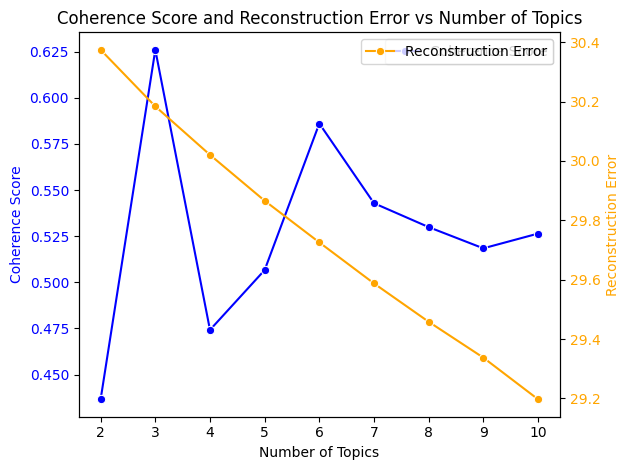

In [20]:
# Inisialisasi list untuk menyimpan hasil
coherence_scores = []
reconstruction_errors = []
n_topics_range = range(2, 11)  # Misalnya mencoba dari 2 sampai 10 topik

for n_topics in n_topics_range:
    # Latih model NMF
    nmf_model = NMF(n_components=n_topics, random_state=42)
    nmf_topics = nmf_model.fit_transform(X_tfidf)

    # Menghitung coherence score
    top_words_per_topic = []
    for idx, topic in enumerate(nmf_model.components_):
        top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
        top_words_per_topic.append(top_words)

    coherence_model = CoherenceModel(topics=top_words_per_topic, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    # Menghitung reconstruction error
    reconstruction_error = nmf_model.reconstruction_err_
    reconstruction_errors.append(reconstruction_error)

# Visualisasi
plt.figure(figsize=(12, 6))

# Plot dengan dua sumbu y
fig, ax1 = plt.subplots()

# Sumbu Y pertama untuk coherence score
sns.lineplot(x=n_topics_range, y=coherence_scores, marker='o', ax=ax1, color='blue', label='Coherence Score')
ax1.set_ylabel('Coherence Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Sumbu Y kedua untuk reconstruction error
ax2 = ax1.twinx()
sns.lineplot(x=n_topics_range, y=reconstruction_errors, marker='o', ax=ax2, color='orange', label='Reconstruction Error')
ax2.set_ylabel('Reconstruction Error', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Menambahkan judul dan label
plt.title('Coherence Score and Reconstruction Error vs Number of Topics')
ax1.set_xlabel('Number of Topics')
plt.xticks(n_topics_range)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [21]:
# Inisialisasi model NMF dengan 10 topik (dapat disesuaikan)
nmf_model = NMF(n_components=5, random_state=42)

# Latih model NMF dan transformasi teks
nmf_topics = nmf_model.fit_transform(X_tfidf)
# Mendapatkan daftar kata dari TfidfVectorizer
words = tfidf_vectorizer.get_feature_names_out()
top_words_per_topic = []
# Menampilkan 10 kata penting dari masing-masing topik
for idx, topic in enumerate(nmf_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    top_words_per_topic.append(top_words)
    print(f"Topik #{idx+1}:")
    print(" ".join(top_words))


Topik #1:
nebeng keluarga indonesia banget si dukung aja fufufafaadalahgibran solo fufufafa
Topik #2:
tp berani dukung jd salah pimpin aja pks ga yg
Topik #3:
ganyangfufufafa selesai bahaya tindak beliau amp hina keluarga prabowo tdk
Topik #4:
allah anak aja orang muka bang gitu jelek banget ya
Topik #5:
nya gak aja nebeng anak si milik mulyono gibran akun


In [22]:
# Step 4: Evaluasi dengan Coherence Score
# Membuat representasi teks dalam bentuk list of list kata
texts = [text.split() for text in df_cleaned['clean_text']]

# Membuat dictionary untuk menghitung coherence score
dictionary = gensim.corpora.Dictionary(texts)

In [23]:
# Step 6: Menampilkan hasil evaluasi
print(f"\nCoherence Score untuk NMF: {coherence_score}")
print(f"Reconstruction Error untuk NMF: {reconstruction_error}")


Coherence Score untuk NMF: 0.5264084102272251
Reconstruction Error untuk NMF: 29.19699195908181
